# LOAN PREDICTION PROBLEM #

### PROBLEM STATEMENT ###


##### ABOUT ##### 
Company Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

##### PROBLEM #####
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.



### DATA ###
* ####  Variable          :   Description

* #### Loan_ID           :   Unique Loan ID

* ####  Gender            :   Male/ Female

* ####  Married           :   Applicant married (Y/N)

* ####  Dependents        :   Number of dependents

* ####  Education         :   Applicant Education (Graduate/ Under Graduate)

* ####  Self_EmployedSelf :  employed (Y/N)

* #### ApplicantIncome   :  Applicant income

* ####  CoapplicantIncome :  Coapplicant income

* ####  LoanAmount        :  Loan amount in thousands

* ####  Loan_Amount_Term  :  Term of loan in months

* ####  Credit_History    :  credit history meets guidelines

* ####  Property_Area     :  Urban/ Semi Urban/ Rural

* ####  Loan_Status       :  Loan approved (Y/N) ###

### TYPE OF PROBLEM ###

It is binary classifiation problem. Using the features we try to predict whether the applicant will get loan or not.

### EVALUATION METRIC USED ###

Since it is a classification problem,  the evalution metric used are:-
* Accuracy - To measure how accurately the model works.
* Confusion matrix - For getting a better clarity of the no of correct/incorrect predictions by the model 

### EXPLORATORY DATA ANALYSIS


In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap
# Seaborn for easier visualization
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [2]:
df_train = pd.read_csv('train.csv') #Load the data in the notebook

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.columns # Viewing all the columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df_train.shape #Check the dimensions of the dataset

(614, 13)

In [6]:
# Since the feature no of dependants is a string, convert it to integer
df_train.Dependents.replace('0', 0 , inplace = True)
df_train.Dependents.replace('1', 1 , inplace = True)
df_train.Dependents.replace('2', 2 , inplace = True)
df_train.Dependents.replace('3+', 3 , inplace = True)

df_train.head(20) #Rechecking the data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
# Changing the target  variable to a numerical feature for easy implementation of algorithms
df_train.Loan_Status.replace('Y', 1 , inplace = True)
df_train.Loan_Status.replace('N', 0, inplace = True)
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [8]:
# Summarize the numerical features
df_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [9]:
# Summarize the categorical features
df_train.describe(include=['object'])

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area
count,614,601,611,614,582,614
unique,614,2,2,2,2,3
top,LP002446,Male,Yes,Graduate,No,Semiurban
freq,1,489,398,480,500,233


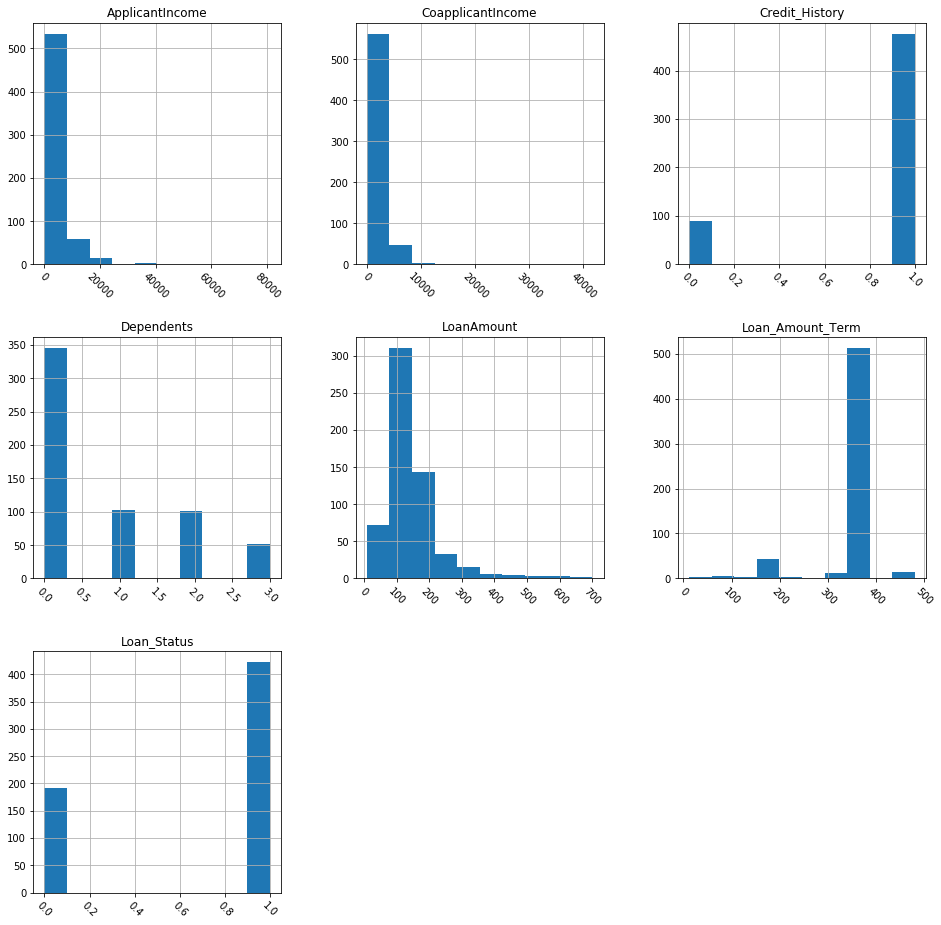

In [11]:
# Plot histogram grid
df_train.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

#### Observations :-
* We can learn the discrete and random features.
* The features Credit_History, Loan_Status, Dependents	are discrete features.
* The features ApplicantsIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term are continuous features.
* The the First Applicants income is mostly less than 20000.
* The the Coappplicants income  Applicants income is mostly less than 20000.


In [12]:
df_train.corr() #Check the correlation between two features

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


#### Observations
* The credit history has a correlation value of 0.5 with Loan_status i.e. it has major impact on the target variable.

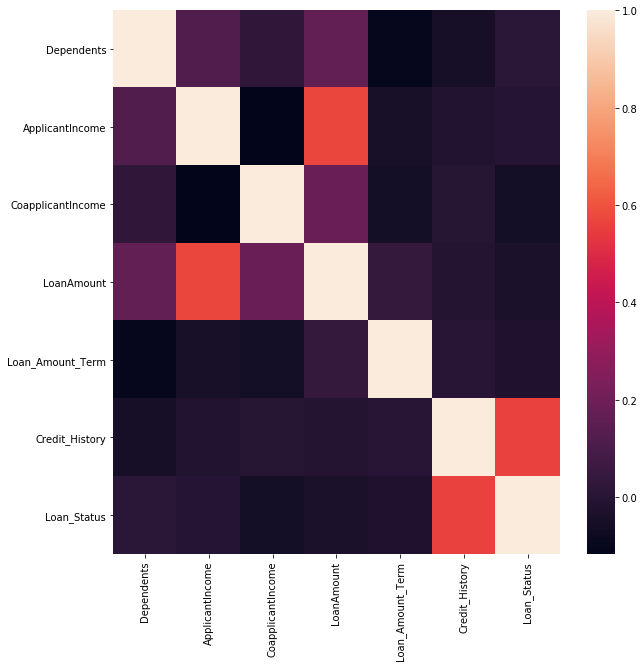

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr())

In [14]:
df_train.Dependents.unique()

array([  0.,   1.,   2.,   3.,  nan])

### CHECK FOR OUTLIERS

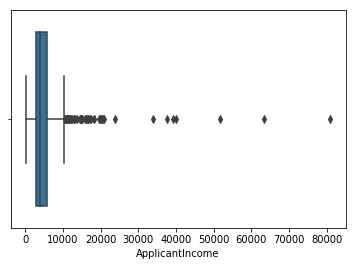

In [15]:
sns.boxplot(df_train.ApplicantIncome)

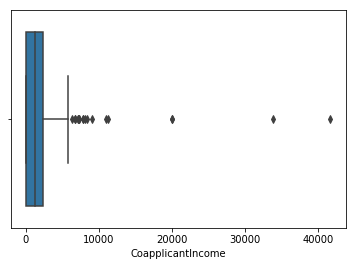

In [16]:
sns.boxplot(df_train.CoapplicantIncome)

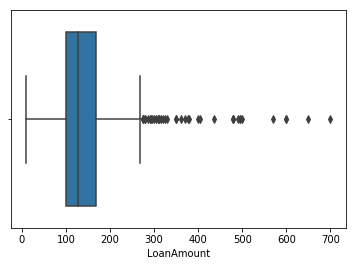

In [17]:
sns.boxplot(df_train.LoanAmount)

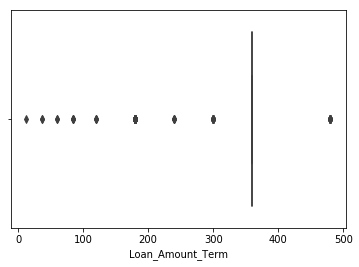

In [18]:
sns.boxplot(df_train.Loan_Amount_Term)

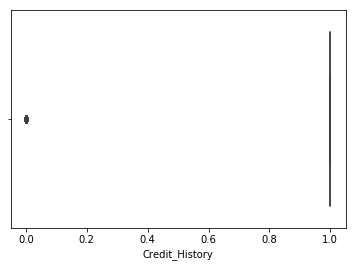

In [19]:
sns.boxplot(df_train.Credit_History)

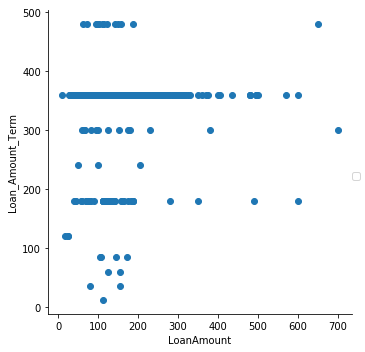

In [20]:
sns.FacetGrid(df_train, size = 5).map(plt.scatter, 'LoanAmount', 'Loan_Amount_Term').add_legend()

### HANDLING THE MISSING VALUES

In [21]:
df_train.select_dtypes(include=['object']).isnull().sum() # Check no of missing values for categorical features.

Loan_ID           0
Gender           13
Married           3
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [22]:
# Fill the missing values with new category missing.
df_train['Gender'] = df_train['Gender'].fillna('Missing')
df_train['Married'] = df_train['Married'].fillna('Missing')
df_train['Self_Employed'] = df_train['Self_Employed'].fillna('Missing')
df_train.select_dtypes(include=['object']).isnull().sum()

Loan_ID          0
Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [23]:
df_train.describe(include=['object']) #Check if there are duplicatates

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area
count,614,614,614,614,614,614
unique,614,3,3,2,3,3
top,LP002446,Male,Yes,Graduate,No,Semiurban
freq,1,489,398,480,500,233


In [24]:
# Check the missing values for numerical features
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [25]:
# Fill the missing values values for loanAmount by substituting the mean of all given present values.
df_train['LoanAmount']=df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())

In [26]:
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


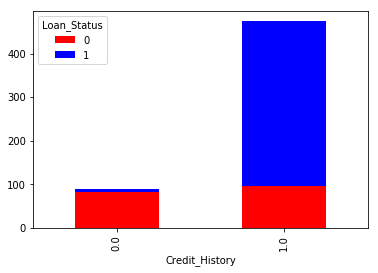

In [27]:
temp= pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

* As the plot shows there are some datapoints where even with Credit_History = 0, we can not fill the missing values on the basis of their loan status.

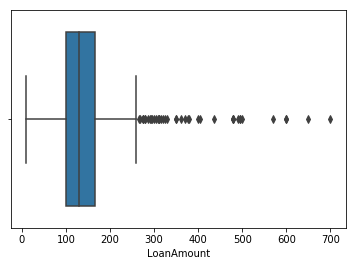

In [28]:
sns.boxplot(df_train.LoanAmount)

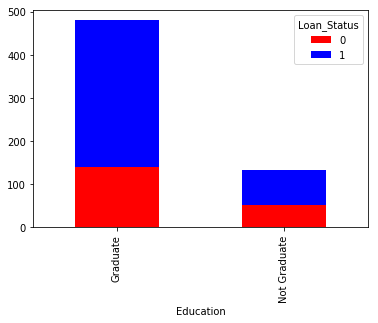

In [29]:
temp1= pd.crosstab(df_train['Education'], df_train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [30]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

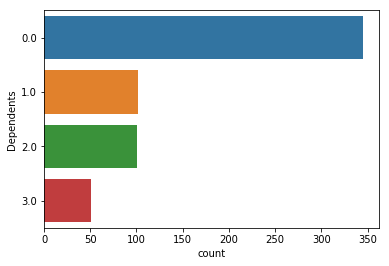

In [31]:
sns.countplot(y='Dependents', data=df_train)

In [32]:
df_train['Dependents']=df_train['Dependents'].fillna(0)

In [33]:
df_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,1.009623,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.00000,1.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [34]:
# As the Credit_History is a discrete variable, filling it with some mean or median value may cauuse erroneous results.
# Thus we drop the data points with missing Credit_History
df_train = df_train[df_train['Credit_History'].notnull()]


In [35]:
df_train.shape

(564, 13)

In [36]:
df_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,550.000000,564.000000,564.000000
mean,0.751773,5466.436170,1530.448440,145.137687,342.152727,0.842199,0.682624
std,1.017824,6271.344106,2471.721359,81.741320,64.586272,0.364878,0.465868
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,0.000000,2892.750000,0.000000,101.750000,360.000000,1.000000,0.000000
50%,0.000000,3815.000000,1105.500000,128.500000,360.000000,1.000000,1.000000
75%,2.000000,5803.750000,2250.000000,162.000000,360.000000,1.000000,1.000000
max,3.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,1.000000


In [37]:
# Fill the missing values for Loan_Amount_Term by median of all the  present values
df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median())


C:\Users\Mahajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_train.shape

(564, 13)

In [39]:
df_train.isnull().sum() # We have no missing values now 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [42]:
# Save the cleaned dataframe for further use.
df_train.to_csv('Cleaned_df_train.csv', index=None)

**FEATURE ENGINEERING**

In [4]:
# Reload the saved dataframe
cleaned_df_train = pd.read_csv('Cleaned_df_train.csv')

In [5]:
cleaned_df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [6]:
# Create a new feature as TotalIncome with ApplicantIncome and CoapplicantIncome
cleaned_df_train['TotalIncome'] = cleaned_df_train['ApplicantIncome'] + cleaned_df_train['CoapplicantIncome']
cleaned_df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0


In [8]:
cleaned_df_train.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome
Dependents,1.000000,0.129492,-0.011969,0.184054,-0.094818,-0.038702,0.024601,0.121428
ApplicantIncome,0.129492,1.000000,-0.126174,0.564836,-0.061693,-0.014715,-0.004530,0.924784
CoapplicantIncome,-0.011969,-0.126174,1.000000,0.157739,-0.000967,-0.002056,-0.033784,0.260769
LoanAmount,0.184054,0.564836,0.157739,1.000000,0.020305,-0.008301,-0.031320,0.610188
Loan_Amount_Term,-0.094818,-0.061693,-0.000967,0.020305,1.000000,-0.003735,-0.019790,-0.060409
Credit_History,-0.038702,-0.014715,-0.002056,-0.008301,-0.003735,1.000000,0.561678,-0.015109
Loan_Status,0.024601,-0.004530,-0.033784,-0.031320,-0.019790,0.561678,1.000000,-0.017367
TotalIncome,0.121428,0.924784,0.260769,0.610188,-0.060409,-0.015109,-0.017367,1.000000


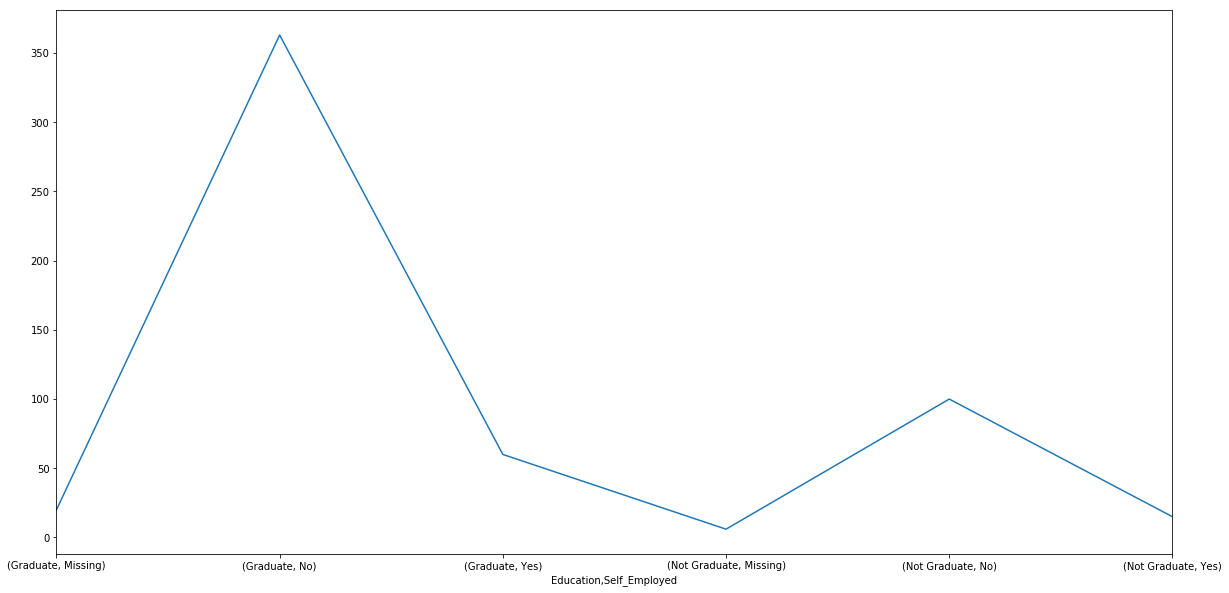

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Education','Self_Employed']).count()['Loan_Status'].plot(ax=ax)



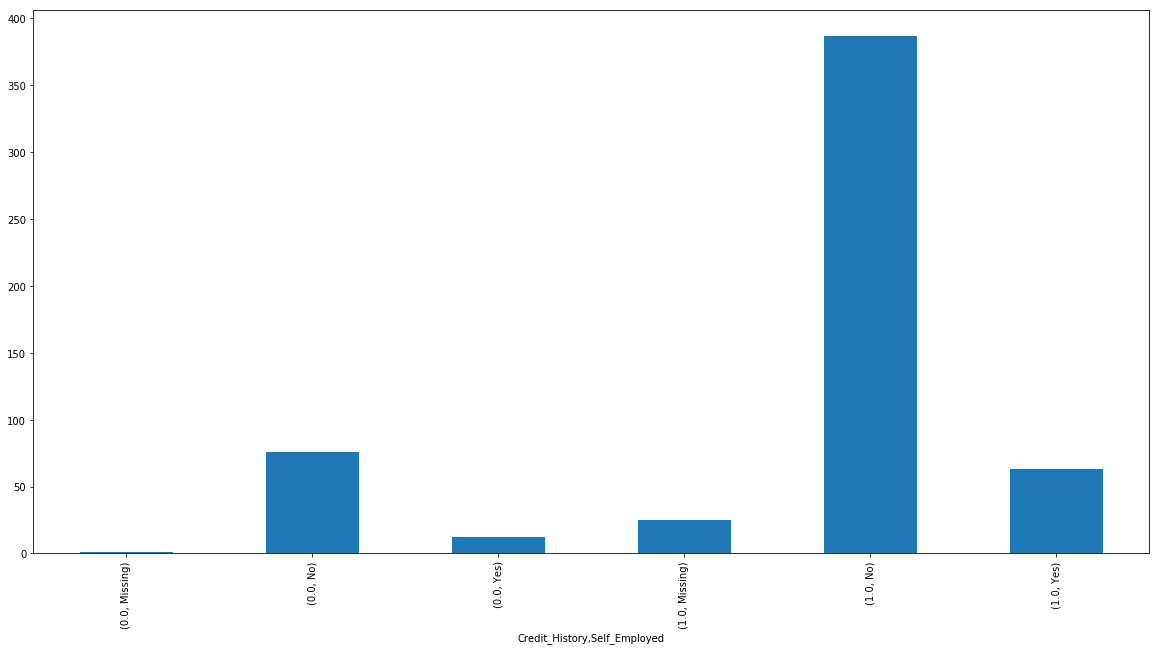

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Credit_History','Self_Employed']).count()['Loan_Status'].plot(ax=ax, kind='bar')


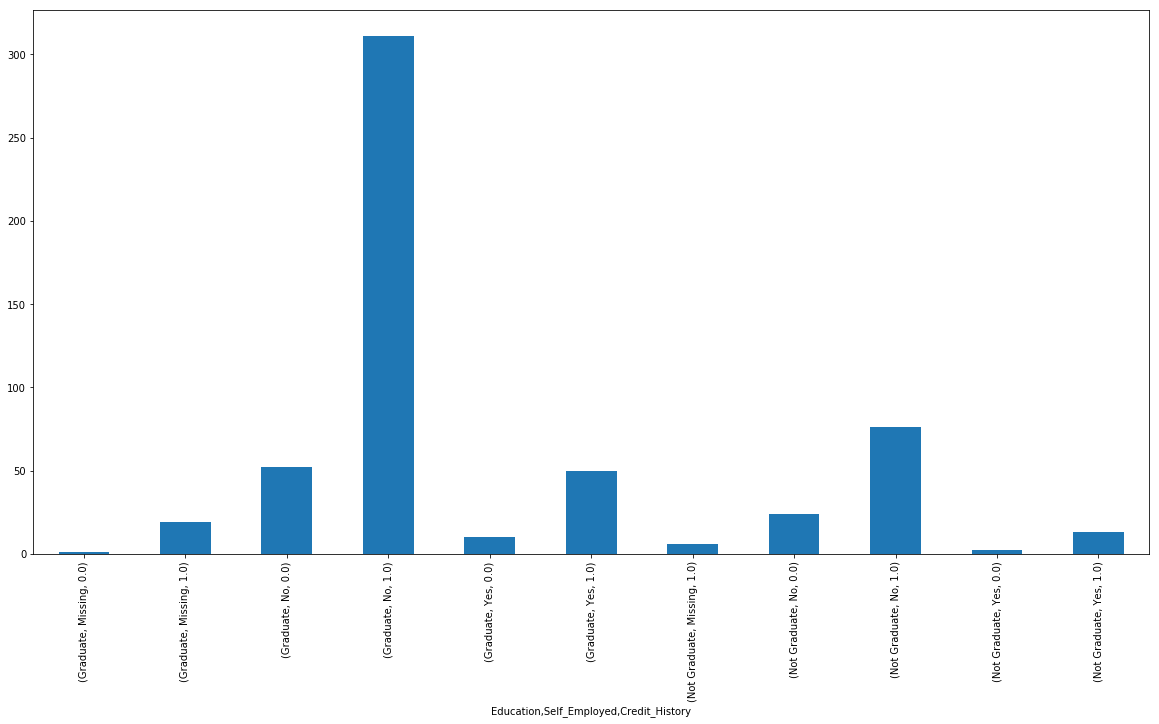

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Education','Self_Employed','Credit_History']).count()['Loan_Status'].plot(ax=ax,kind='bar')



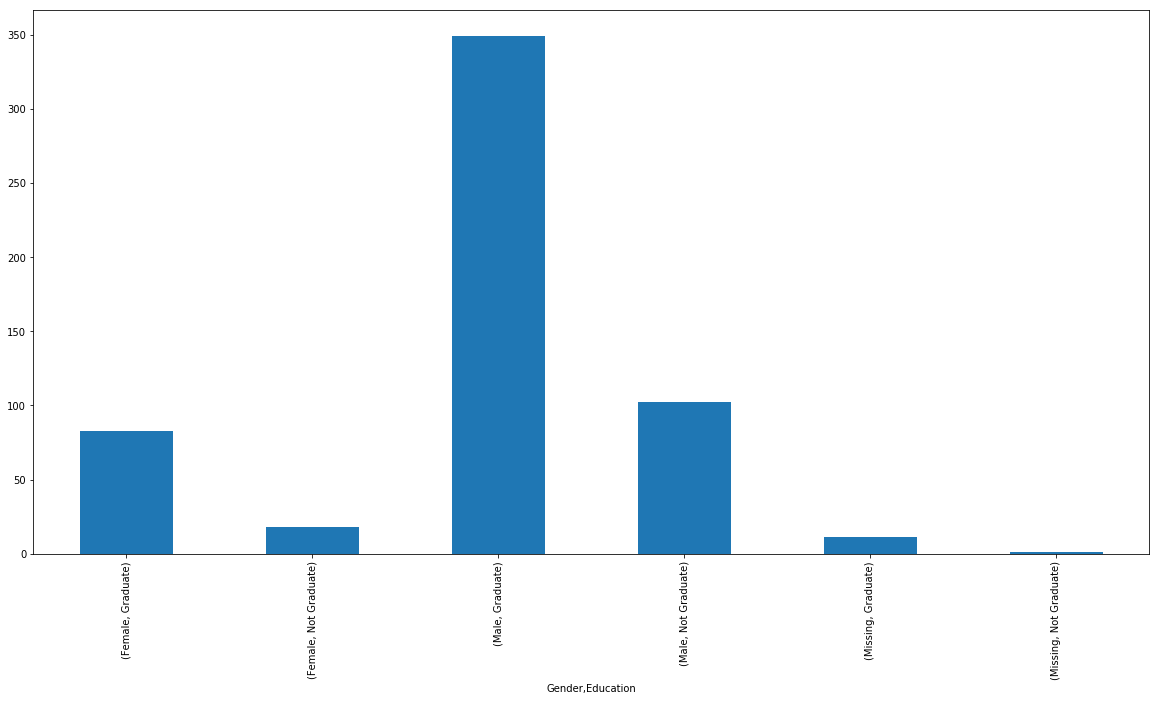

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Gender','Education']).count()['Loan_Status'].plot(ax=ax,kind='bar')



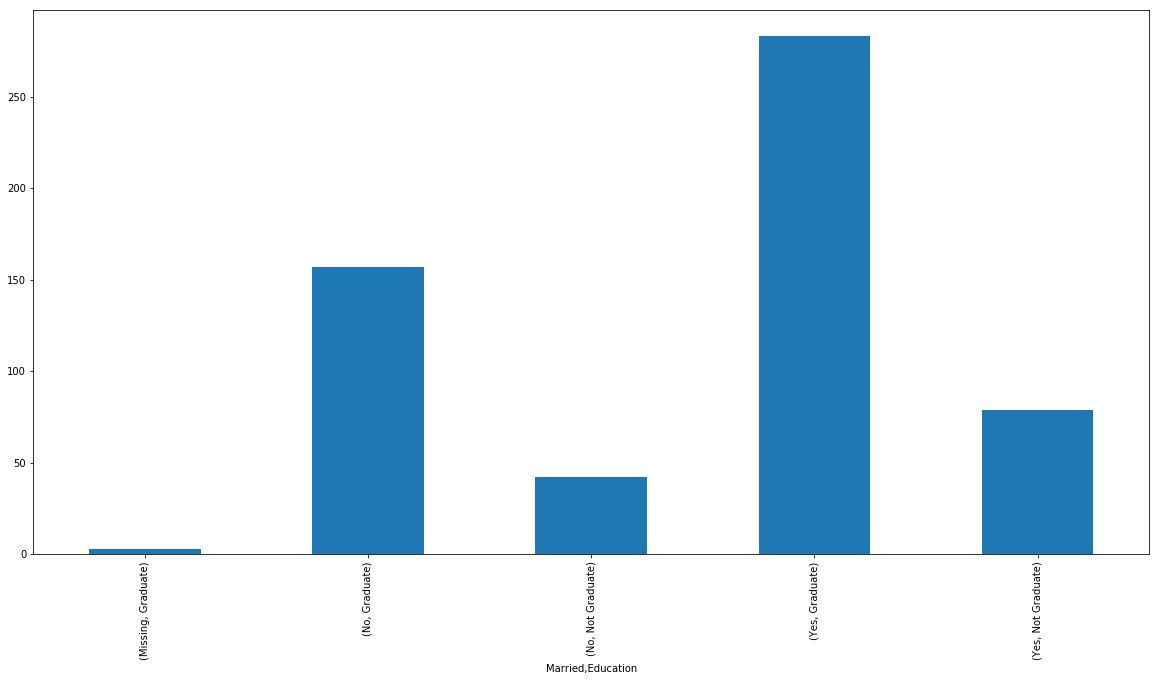

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Married','Education']).count()['Loan_Status'].plot(ax=ax,kind='bar')

In [76]:
cleaned_df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

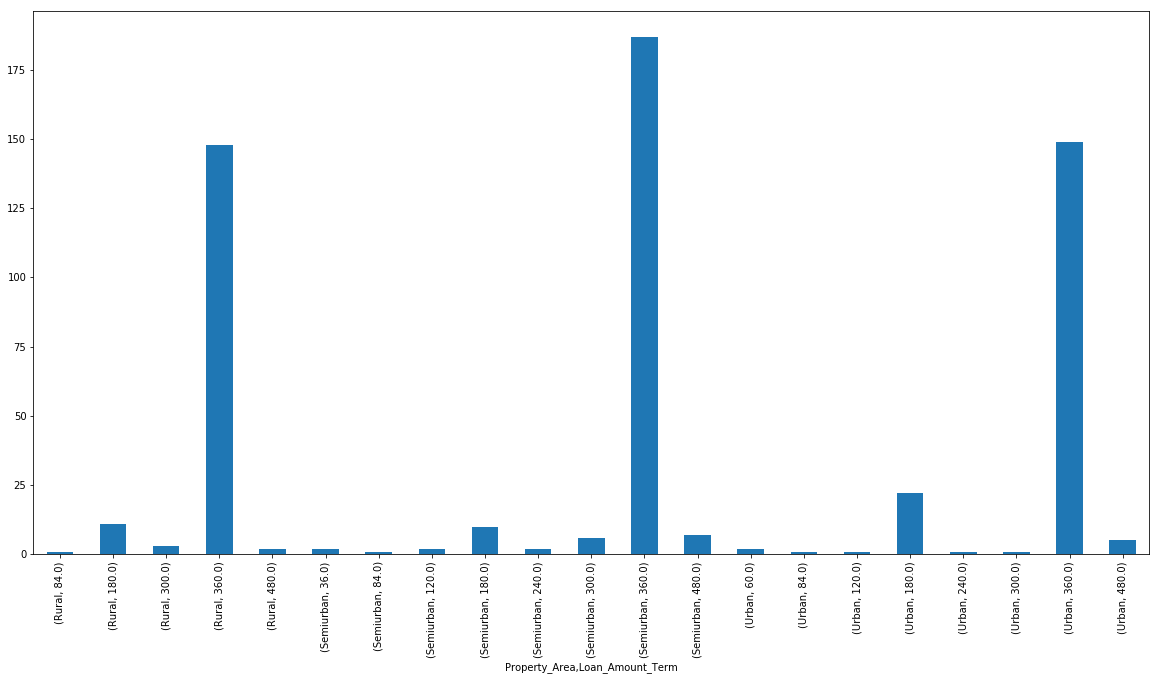

In [77]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Property_Area','Loan_Amount_Term']).count()['Loan_Status'].plot(ax=ax,kind='bar')

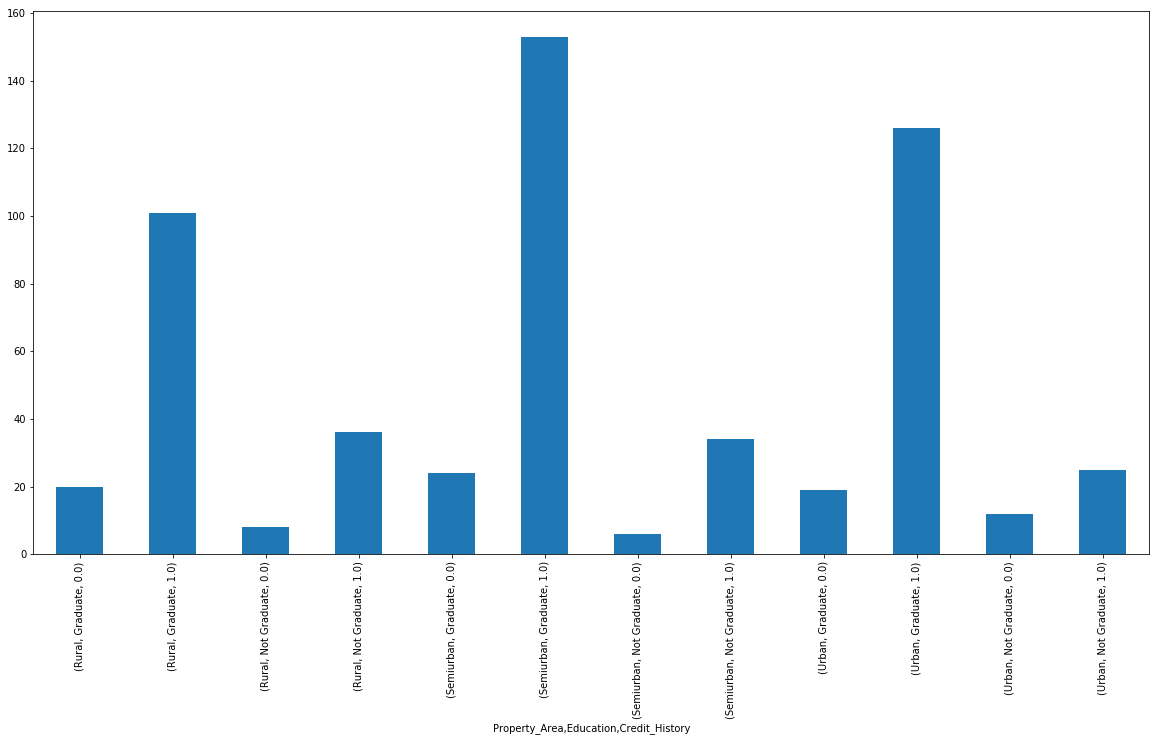

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Property_Area','Education','Credit_History']).count()['Loan_Status'].plot(ax=ax,kind='bar')



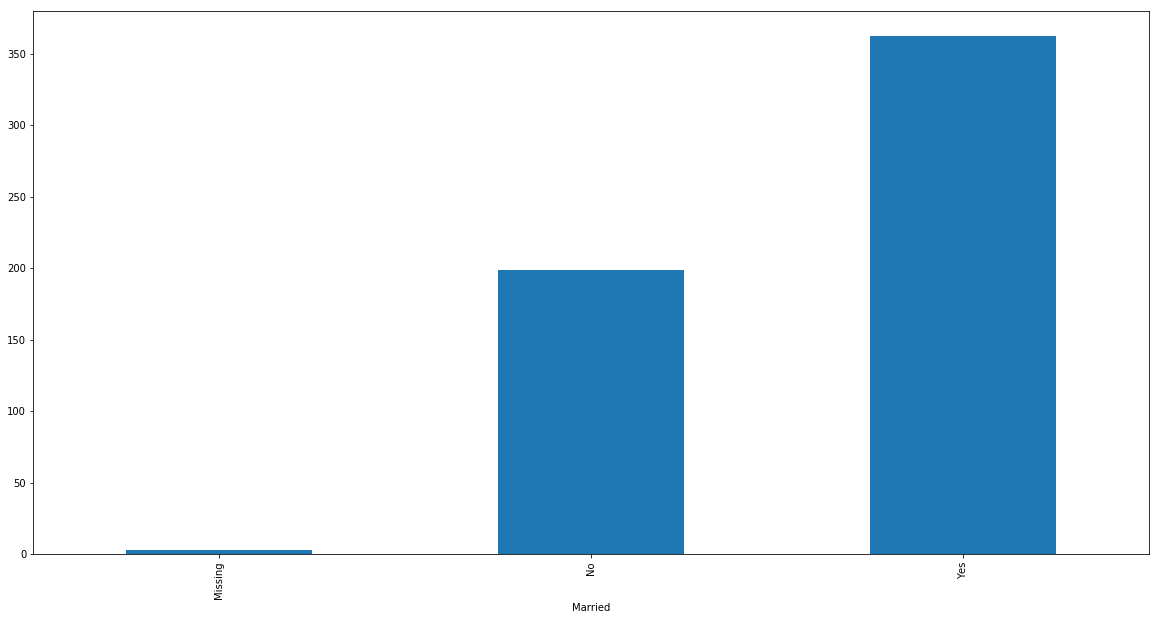

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Married']).count()['Loan_Status'].plot(ax=ax,kind='bar')

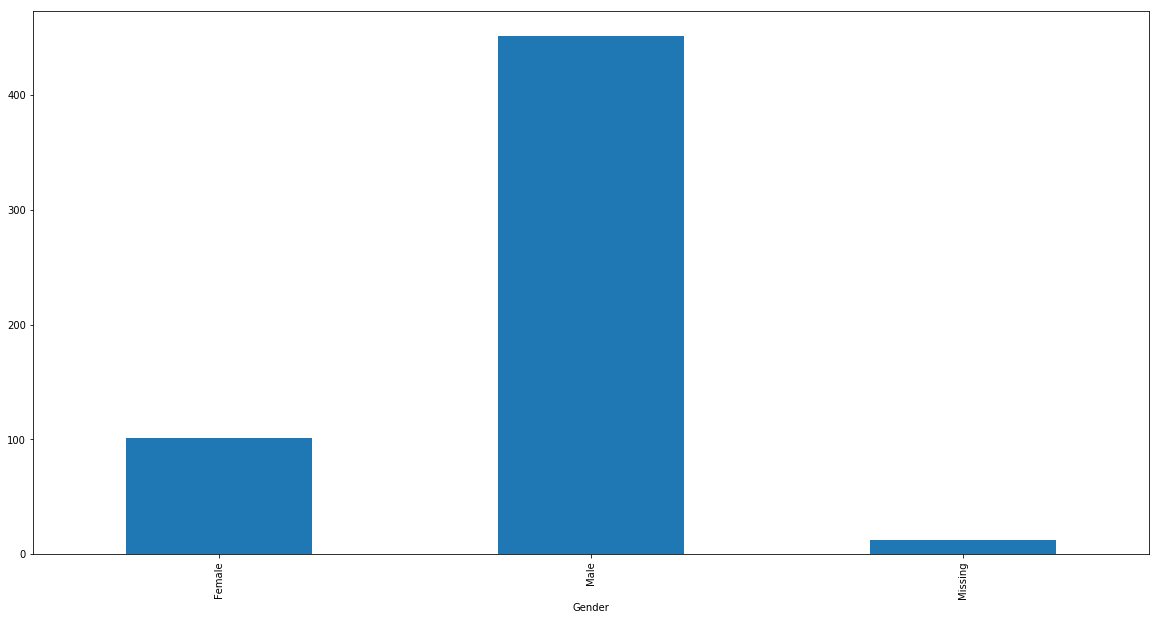

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Gender']).count()['Loan_Status'].plot(ax=ax,kind='bar')

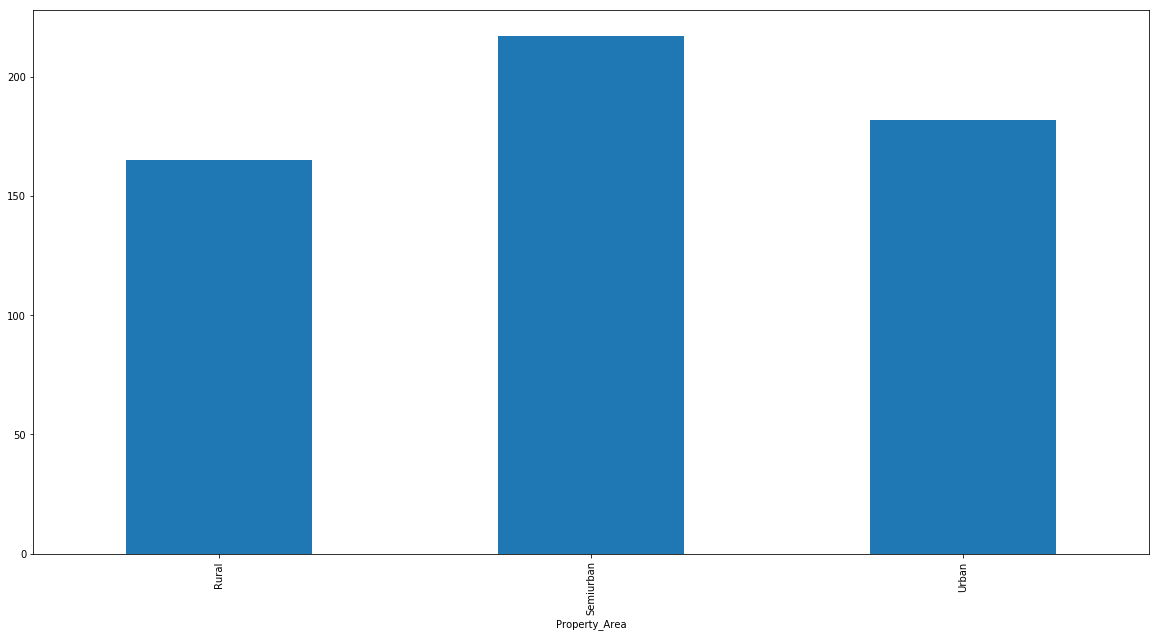

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
cleaned_df_train.groupby(['Property_Area']).count()['Loan_Status'].plot(ax=ax,kind='bar')

### Removing useless features

In [85]:
# As marital status of an applicant doesn't play an important role in the loan_Status it should be dropped.
cleaned_df_train.drop('Married',axis=1,inplace = True)
cleaned_df_train.head()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0


### ONE - HOT ENCODING

In [90]:
# Handling the categorical data
cleaned_df_train = pd.get_dummies(cleaned_df_train, columns=['Gender', 'Education', 'Self_Employed','Property_Area'])
cleaned_df_train.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender_Female,Gender_Male,Gender_Missing,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,1,0,1,0,0,1,0,0,0,1
1,LP001003,1.0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0,1,0,1,0,0,1,0,1,0,0
2,LP001005,0.0,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,1,0,1,0,0,0,1,0,0,1
3,LP001006,0.0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,1,0,0,1,0,1,0,0,0,1
4,LP001008,0.0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,1,0,1,0,0,1,0,0,0,1


## Remove Unique Features

In [ ]:
# As Loan_ID is a feature with unique values, it is not useful to determine the value of the target variable.
df_train.drop('Loan_ID',axis=1, inplace= True)
df_test.drop('Loan_ID',axis=1,inplace= True)

In [103]:
cleaned_df_train.to_csv('train_model.csv', index=None) #Save the training modified dataframe

In [12]:
df_test=pd.read_csv('test.csv') #Loading the test dataframe

In [13]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
#  This function takes test dataframe as input and does all the changes to testing dataset that we have done with training dataset. 
def testing(df_test):
    df_test.Dependents.replace('0', 0 , inplace = True)
    df_test.Dependents.replace('1', 1 , inplace = True)
    df_test.Dependents.replace('2', 2 , inplace = True)
    df_test.Dependents.replace('3+', 3 , inplace = True)


    df_test['Gender'] = df_test['Gender'].fillna('Missing')
    df_test['Married'] = df_test['Married'].fillna('Missing')
    df_test['Self_Employed'] = df_test['Self_Employed'].fillna('Missing')
    
    df_test.loc[ (pd.isnull(df['Credit_History'])) & (df['Loan_Status'] == 1), 'Credit_History'] = 1

    df_test.loc[ (pd.isnull(df['Credit_History'])) & (df['Loan_Status'] == 0), 'Credit_History'] = 0



    df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())


    df_test['Dependents']=df_test['Dependents'].fillna(0)



    df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())



    df_test['TotalIncome'] = df_test['ApplicantIncome'] +df_test['CoapplicantIncome']
    df_test.drop('Married',axis=1, inplace=True)



    df_test = pd.get_dummies(df_test, columns=['Gender', 'Education', 'Self_Employed','Property_Area'])
    return df_test




In [15]:
df_test = testing(df_test)
df_test.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Gender_Missing,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0.0,5720,0,110.0,360.0,1.0,5720,0,1,0,1,0,0,1,0,0,0,1
1,LP001022,1.0,3076,1500,126.0,360.0,1.0,4576,0,1,0,1,0,0,1,0,0,0,1
2,LP001031,2.0,5000,1800,208.0,360.0,1.0,6800,0,1,0,1,0,0,1,0,0,0,1
3,LP001035,2.0,2340,2546,100.0,360.0,NaN,4886,0,1,0,1,0,0,1,0,0,0,1
4,LP001051,0.0,3276,0,78.0,360.0,1.0,3276,0,1,0,0,1,0,1,0,0,0,1


In [16]:
df_test.drop('Loan_ID',axis=1,inplace= True)

In [17]:
df_test.head()
df_test.shape

(367, 18)

In [102]:
#  Save the test modified model as well
df_test.to_csv('test_model.csv',index = None)

## DATA MODELS

In [48]:
df_train=pd.read_csv('train_model.csv')
df_test=pd.read_csv('test_model.csv')

In [3]:
df_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender_Female,Gender_Male,Gender_Missing,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,1,0,1,0,0,1,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0,1,0,1,0,0,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,1,0,1,0,0,0,1,0,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,1,0,0,1,0,1,0,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,1,0,1,0,0,1,0,0,0,1


In [3]:
df_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Gender_Missing,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5720,0,110.0,360.0,1.0,5720,0,1,0,1,0,0,1,0,0,0,1
1,1.0,3076,1500,126.0,360.0,1.0,4576,0,1,0,1,0,0,1,0,0,0,1
2,2.0,5000,1800,208.0,360.0,1.0,6800,0,1,0,1,0,0,1,0,0,0,1
3,0.0,3276,0,78.0,360.0,1.0,3276,0,1,0,0,1,0,1,0,0,0,1
4,0.0,2165,3422,152.0,360.0,1.0,5587,0,1,0,0,1,0,0,1,0,0,1


In [5]:
y = df_train.Loan_Status

# Create separate object for input features
X = df_train.drop('Loan_Status', axis=1)

In [6]:
#Performing the train and test dataset split within the train dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df_train.Loan_Status)


In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 18) (113, 18) (451,) (113,)


In [9]:
#Standardizing the data
train_mean = X_train.mean()
train_std = X_train.std()

NameError: name 'X_train' is not defined

In [13]:
train_mean.to_pickle("train_mean.pkl")
train_std.to_pickle("train_std.pkl")

In [9]:
X_train = (X_train - train_mean) / train_std

In [10]:
X_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Gender_Missing,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,-6.646568e-18,5.588041e-17,6.178847e-17,1.912735e-16,2.299220e-16,1.437628e-16,-9.649832e-17,-9.502131e-17,-1.733031e-16,-6.683493e-17,2.225369e-16,-3.475909e-16,7.815872e-17,-3.791005e-16,-2.818637e-16,-1.870886e-17,-1.255463e-16,-6.597334e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.452698e-01,-1.020055e+00,-6.190140e-01,-1.683993e+00,-4.650050e+00,-2.310897e+00,-1.030275e+00,-4.813787e-01,-1.946651e+00,-1.425372e-01,-1.946651e+00,-5.125637e-01,-2.368153e-01,-2.134894e+00,-3.799333e-01,-6.425540e-01,-7.953943e-01,-6.841165e-01
25%,-7.452698e-01,-4.799614e-01,-6.190140e-01,-5.003244e-01,2.720344e-01,4.317729e-01,-4.989645e-01,-4.813787e-01,5.125637e-01,-1.425372e-01,5.125637e-01,-5.125637e-01,-2.368153e-01,4.673687e-01,-3.799333e-01,-6.425540e-01,-7.953943e-01,-6.841165e-01
50%,-7.452698e-01,-2.930699e-01,-1.196148e-01,-1.998077e-01,2.720344e-01,4.317729e-01,-2.750437e-01,-4.813787e-01,5.125637e-01,-1.425372e-01,5.125637e-01,-5.125637e-01,-2.368153e-01,4.673687e-01,-3.799333e-01,-6.425540e-01,-7.953943e-01,-6.841165e-01
75%,1.226089e+00,9.129740e-02,2.772154e-01,1.927040e-01,2.720344e-01,4.317729e-01,1.453791e-01,-4.813787e-01,5.125637e-01,-1.425372e-01,5.125637e-01,-5.125637e-01,-2.368153e-01,4.673687e-01,-3.799333e-01,1.552839e+00,1.254450e+00,1.458498e+00
max,2.211769e+00,9.096391e+00,1.237958e+01,6.791807e+00,2.095029e+00,4.317729e-01,8.355747e+00,2.072760e+00,5.125637e-01,7.000158e+00,5.125637e-01,1.946651e+00,4.213338e+00,4.673687e-01,2.626205e+00,1.552839e+00,1.254450e+00,1.458498e+00


In [11]:
X_test = (X_test - train_mean) / train_std

In [12]:
X_test.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Gender_Missing,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,-0.021275,0.109790,-0.155162,-0.070520,0.038110,-0.005113,0.029140,-0.119731,0.099067,0.047092,-0.075036,0.075036,-0.158051,0.006791,0.098921,-0.001422,-0.033505,0.036409
std,1.020426,1.888861,0.703425,1.015616,0.841935,1.008146,1.801122,0.894421,0.923823,1.153376,1.053366,1.053366,0.589391,0.997607,1.104991,1.002688,0.995008,1.016760
min,-0.745270,-0.917348,-0.619014,-1.487737,-3.373954,-2.310897,-0.845058,-0.481379,-1.946651,-0.142537,-1.946651,-0.512564,-0.236815,-2.134894,-0.379933,-0.642554,-0.795394,-0.684116
25%,-0.745270,-0.484568,-0.619014,-0.629117,0.272034,0.431773,-0.623096,-0.481379,0.512564,-0.142537,0.512564,-0.512564,-0.236815,0.467369,-0.379933,-0.642554,-0.795394,-0.684116
50%,-0.745270,-0.343835,-0.619014,-0.322468,0.272034,0.431773,-0.413257,-0.481379,0.512564,-0.142537,0.512564,-0.512564,-0.236815,0.467369,-0.379933,-0.642554,-0.795394,-0.684116
75%,1.226089,-0.013566,0.080145,0.180438,0.272034,0.431773,-0.079381,-0.481379,0.512564,-0.142537,0.512564,-0.512564,-0.236815,0.467369,-0.379933,1.552839,1.254450,1.458498
max,2.211769,14.827011,3.594378,5.197228,2.095029,0.431773,13.809119,2.072760,0.512564,7.000158,0.512564,1.946651,4.213338,0.467369,2.626205,1.552839,1.254450,1.458498


##  Model-1 Logistic Regression


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [52]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'accuracy', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_train_pred = model.predict(X_train)

In [55]:
y_pred = model.predict(X_test)

In [56]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

82.30088495575221

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred).T

array([[17,  1],
       [19, 76]], dtype=int64)

In [72]:
model = LogisticRegression(C=0.1, penalty = 'l1')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Credit_History
Property_Area_Semiurban
Education_Graduate
Dependents
Property_Area_Rural
Self_Employed_Yes
Self_Employed_No
Self_Employed_Missing
Education_Not Graduate
Gender_Male
Gender_Female
TotalIncome
Loan_Amount_Term
LoanAmount
CoapplicantIncome
ApplicantIncome
Gender_Missing
Property_Area_Urban


## Model-2 Random Forest

In [64]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model1 = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model1.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [65]:
model1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
y_train_pred = model1.predict(X_train)

In [67]:
y_pred = model1.predict(X_test)

In [68]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

83.185840707964601

In [70]:
model1 = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=2)
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
indices = np.argsort(-model1.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Credit_History
TotalIncome
ApplicantIncome
LoanAmount
CoapplicantIncome
Loan_Amount_Term
Dependents
Property_Area_Semiurban
Property_Area_Urban
Property_Area_Rural
Education_Not Graduate
Education_Graduate
Gender_Male
Gender_Female
Self_Employed_No
Self_Employed_Yes
Self_Employed_Missing
Gender_Missing


In [74]:
confusion_matrix(y_test, y_pred).T

array([[19,  2],
       [17, 75]], dtype=int64)

## Model-3 Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model3 = DecisionTreeClassifier(criterion = "gini", random_state = 123,
                               max_depth=3, min_samples_leaf=5)
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [43]:
y_pred = model3.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [44]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

80.530973451327441

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred).T

array([[16,  2],
       [20, 75]], dtype=int64)

## Model-4 KNN Classifier Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score



C:\Users\Mahajan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 5.


In [13]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_pred = classifier.predict(X_test)


In [15]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

75.221238938053091

In [16]:
confusion_matrix(y_test, y_pred).T

array([[15,  7],
       [21, 70]], dtype=int64)

## Model-5 Naive Bayes Classifier


In [14]:
from sklearn.naive_bayes import BernoulliNB


In [15]:
alpha= np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=BernoulliNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1 - x for x in cv_scores]

optimal_alpha= alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is {}'.format(optimal_alpha))

    


The optimal value of alpha is 0.7000000000000001


In [16]:
clf=BernoulliNB(alpha=optimal_alpha)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [17]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)

83.185840708


In [18]:
confusion_matrix(y_test,y_pred).T

array([[18,  1],
       [18, 76]], dtype=int64)

## Summarizing the results from all models


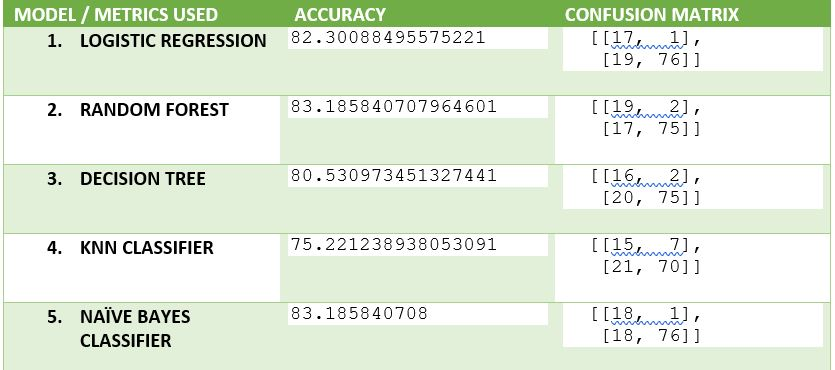

In [23]:
from IPython.display import Image
Image(filename='summmary.jpg')

### Observations:-

* The Random Forest and Naive Bayes classifier gives almost the sae results.
* This is beacuse these models work on the probabilities.
* KNN Classsifer works with the least  accuracy.
* The winning model is Random forest and Naive Bayes classifier model

## Save the winning model

In [19]:
from sklearn.externals import joblib  ## Reference http://scikit-learn.org/stable/modules/model_persistence.html

In [26]:
win_model = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=2)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'rfc_loan') 

['rfc_loan']

In [27]:
win_model_1 = BernoulliNB(alpha=0.7000000000000001)
win_model_1.fit(X_train, y_train)
joblib.dump(win_model_1, 'nbc_loan') 

['nbc_loan']

In [20]:
win_model = joblib.load('rfc_loan') 

In [7]:
win_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
df_train.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender_Female,Gender_Male,Gender_Missing,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,1,0,1,0,0,1,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0,1,0,1,0,0,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,1,0,1,0,0,0,1,0,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,1,0,0,1,0,1,0,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,1,0,1,0,0,1,0,0,0,1


In [21]:
train_mean = pd.read_pickle("train_mean.pkl")
train_std = pd.read_pickle('train_std.pkl')


In [22]:
df_test = (df_test - train_mean) / train_std

In [23]:
y_test_pred = win_model.predict(df_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [54]:
submission = pd.DataFrame()

In [55]:
final_test=pd.read_csv('test.csv') 

In [56]:
final_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [57]:
y_test_pred.shape

(338,)

In [34]:
submission['Loan_ID'] = final_test['Loan_ID']
submission.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
4,LP001051
5,LP001054


In [35]:
submission.shape

(338, 1)

In [36]:
submission['Loan_Status'] = y_test_pred

In [39]:
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1
10,LP001078,1


In [42]:
submission.reset_index(inplace = True)
submission.head()


,index,Loan_ID,Loan_Status
0,0,LP001015,1
1,1,LP001022,1
2,2,LP001031,1
3,4,LP001051,1
4,5,LP001054,1


In [46]:
submission.drop('index', axis = 1)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001051,1
4,LP001054,1
5,LP001055,1
6,LP001056,0
7,LP001059,1
8,LP001067,1
9,LP001078,1


In [47]:
submission.to_csv('sample_submission.csv', index=None)